In [10]:
import pandas as pd
import numpy as np


In [11]:
df= pd.read_csv('housing.csv')


In [12]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
mean_total_bedrooms = df["total_bedrooms"].mean()
df["total_bedrooms"] = df["total_bedrooms"].fillna(mean_total_bedrooms)

In [16]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [19]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

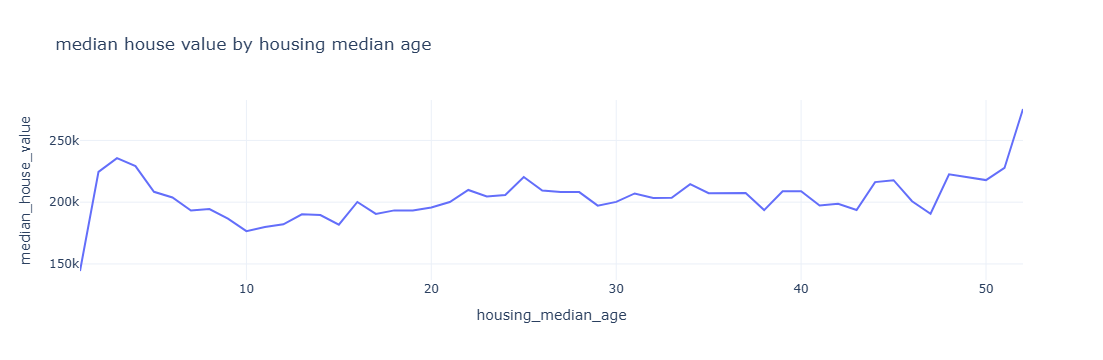

In [20]:
import plotly.express as px
median_house_value_by_housing_median_age = df.groupby('housing_median_age')['median_house_value'].mean().reset_index()
# Creating a line chart
fig = px.line(
   median_house_value_by_housing_median_age,
   x='housing_median_age',
   y='median_house_value',
   title='median house value by housing median age',
   labels={'housing_median_age': 'housing_median_age', 'median_house_value': 'median_house_value'},
   template='plotly_white'
)
fig.show()

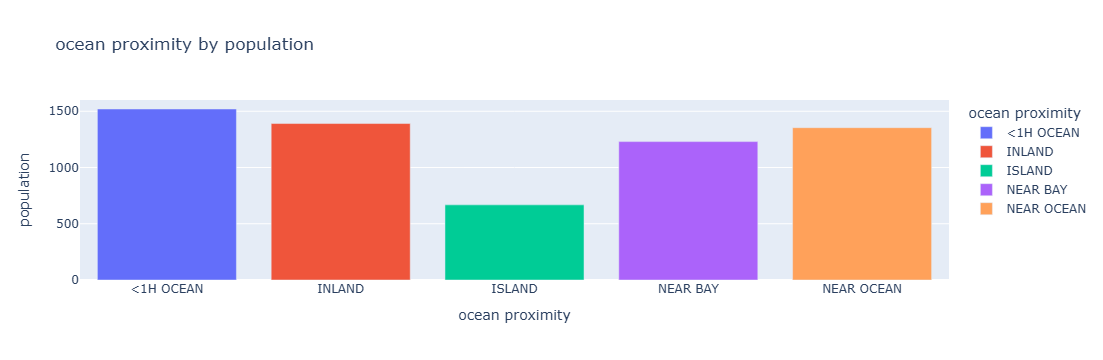

In [21]:
avg_price_by_cut = df.groupby('ocean_proximity')['population'].mean().reset_index()

# Creating a bar chart
fig = px.bar(
    avg_price_by_cut,
    x='ocean_proximity',
    y='population',
    title=' ocean proximity by population ',
    labels={'ocean_proximity': 'ocean proximity', 'population': 'population'},
    color='ocean_proximity' 
)


# Display the figure
fig.show()

In [22]:
numerical_cols =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

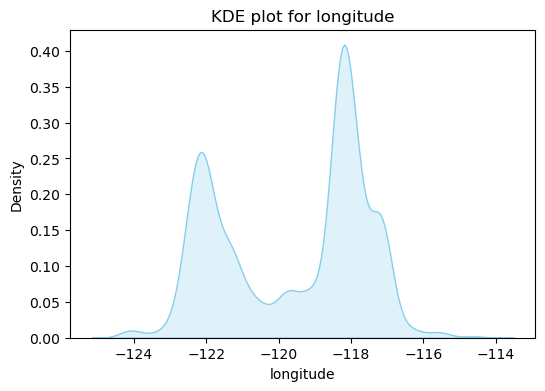

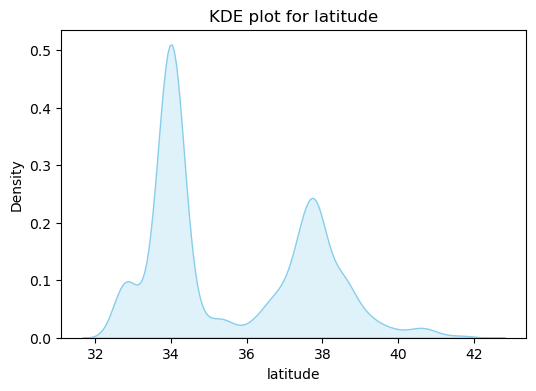

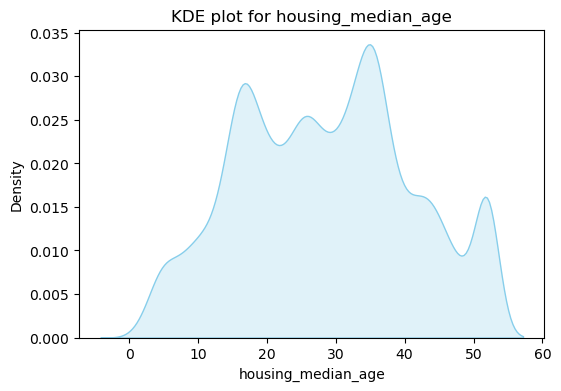

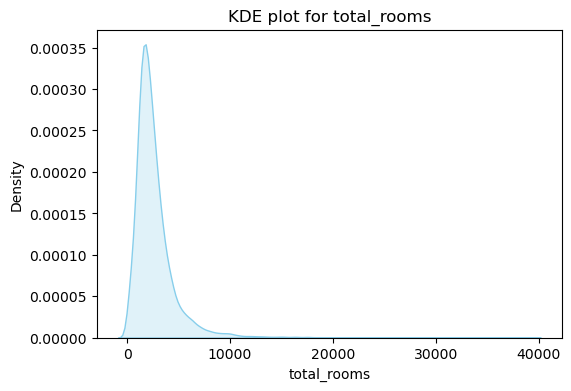

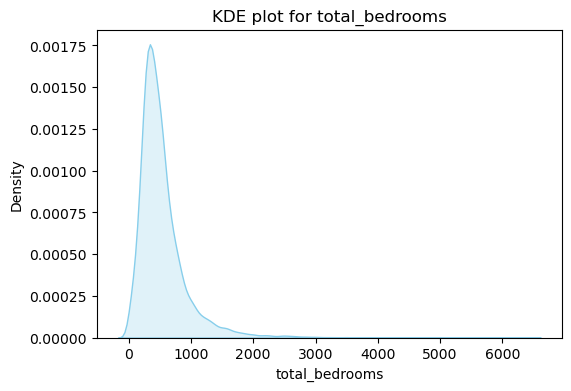

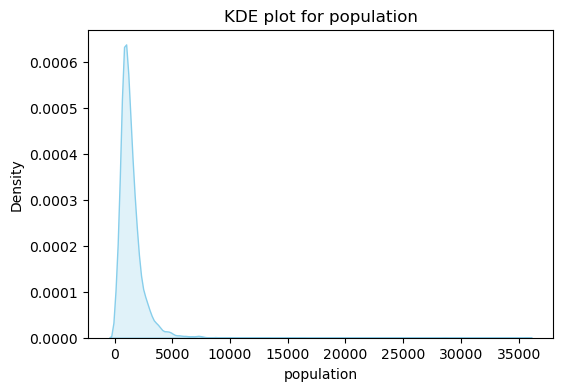

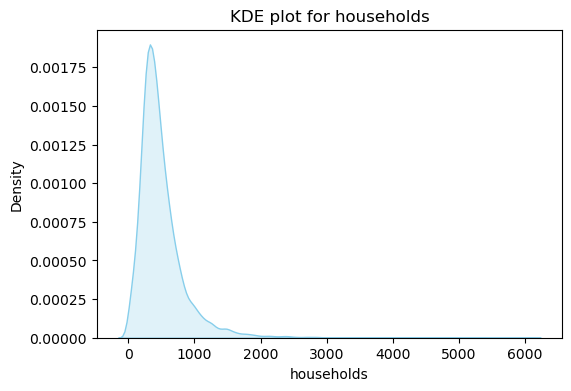

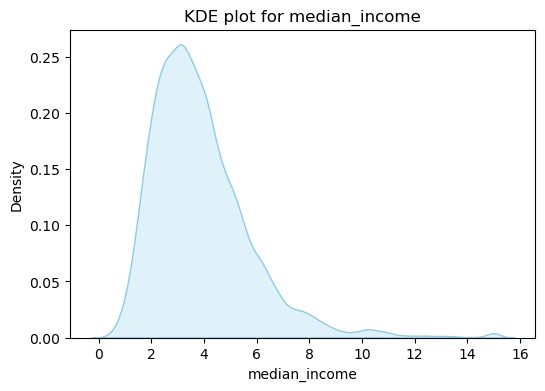

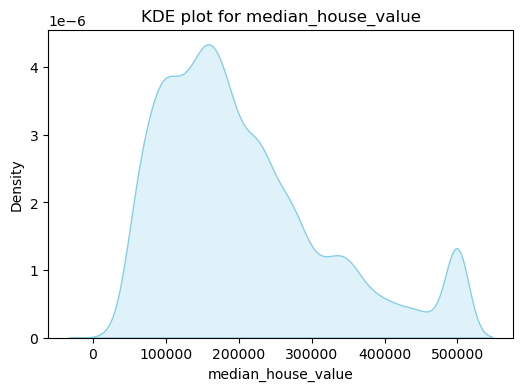

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], fill=True, color='skyblue')
    plt.title(f"KDE plot for {col}")
    plt.xlabel(col)
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18310f19790>,
 'caps': [<matplotlib.lines.Line2D at 0x1830e653380>,
 'boxes': [<matplotlib.lines.Line2D at 0x18310f1b3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1830e653530>],
 'fliers': [<matplotlib.lines.Line2D at 0x1830e653d40>],
 'means': []}

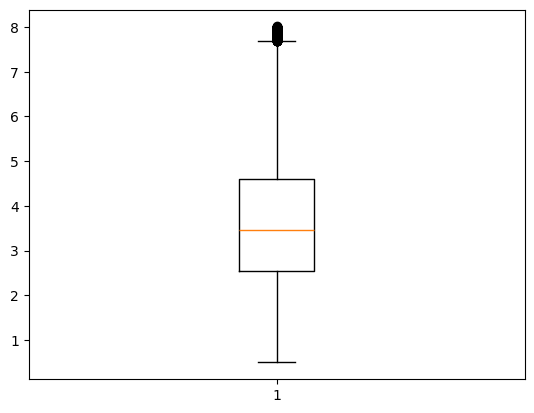

In [24]:

Q3 = df["median_income"].quantile(0.75)
Q1 = df["median_income"].quantile(0.25)

IQR = Q3 - Q1

upper_whisker = Q3 + 1.5 * IQR
lower_whisker =  Q1 - 1.5 * IQR
mask = (df["median_income"] < upper_whisker) & (df["median_income"] > lower_whisker)
df = df[mask]

plt.boxplot(df["median_income"])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ocean_proximity"] = le.fit_transform(df["ocean_proximity"])


In [27]:
df.shape

(19959, 10)

In [28]:
X = df.drop(['median_house_value'], axis=1)

y = df['median_house_value']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15967, 9), (3992, 9), (15967,), (3992,))

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


mae  , mse , rmse ,r2

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(49960.65637372816, 4633931550.726442, 68072.98693847981, 0.5808041036295188)

<Axes: >

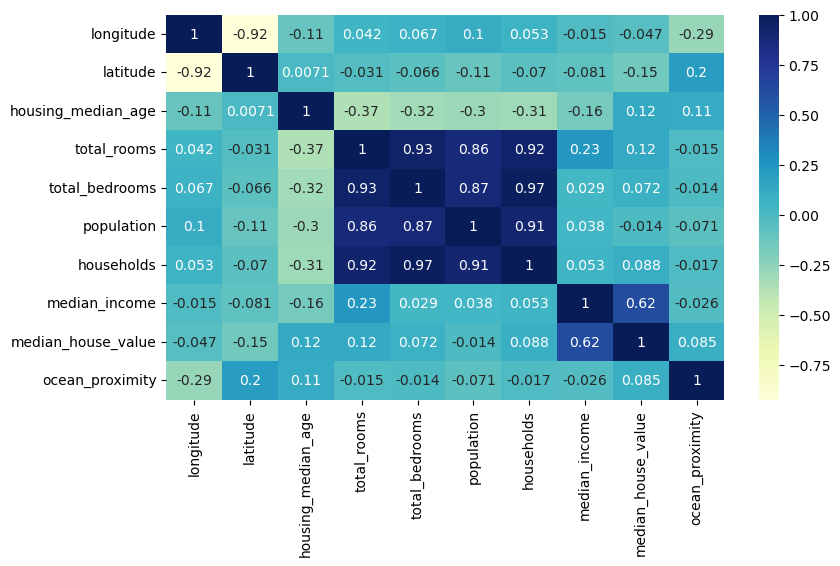

In [35]:
plt.figure(figsize=(9,5))
sns.heatmap( df.corr(),annot=True,cmap='YlGnBu')

In [36]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]


<Axes: >

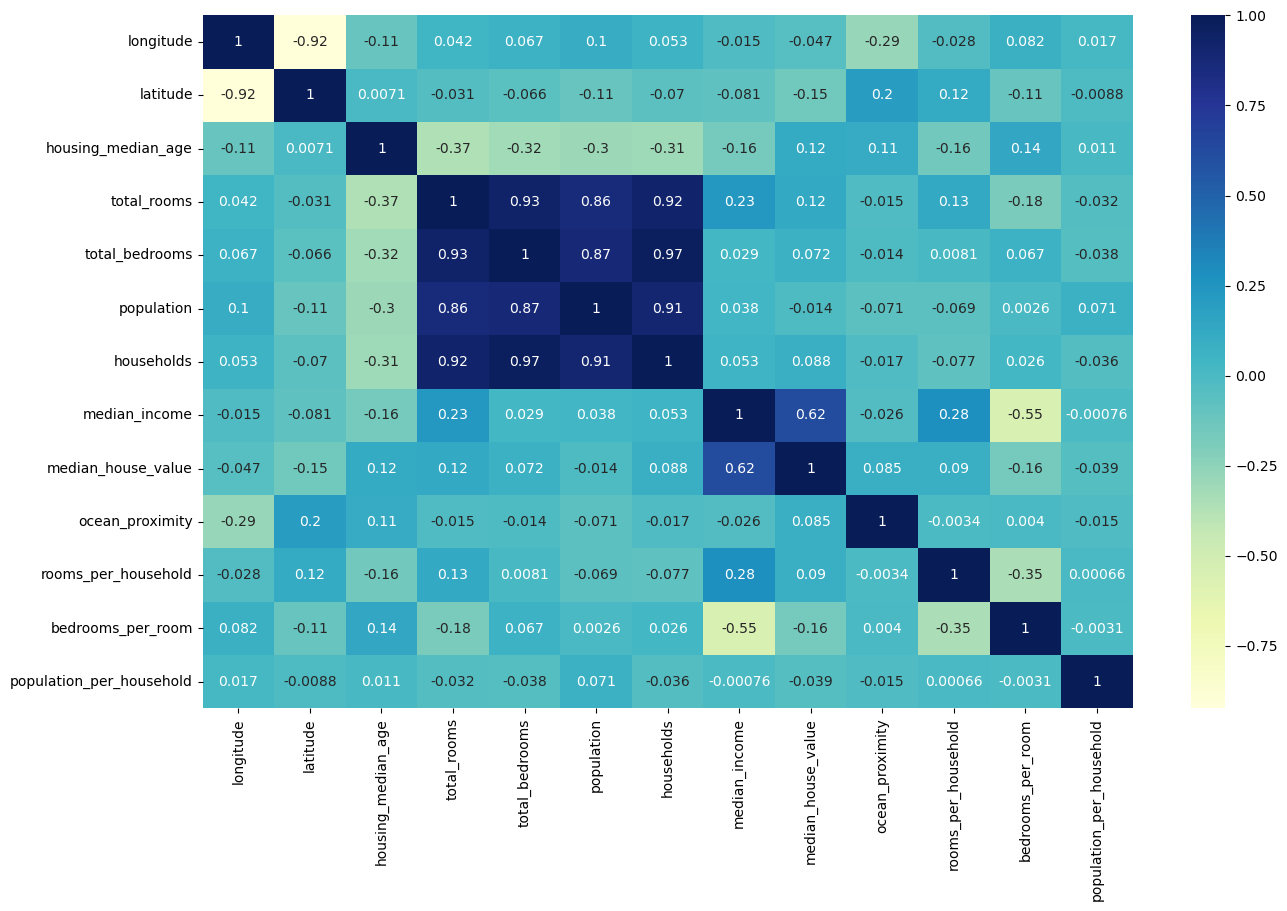

In [37]:
plt.figure(figsize=(15,9))
sns.heatmap( df.corr(),annot=True,cmap='YlGnBu')

In [38]:
df = df.drop(["total_rooms", "total_bedrooms", "population"], axis=1)


<Axes: >

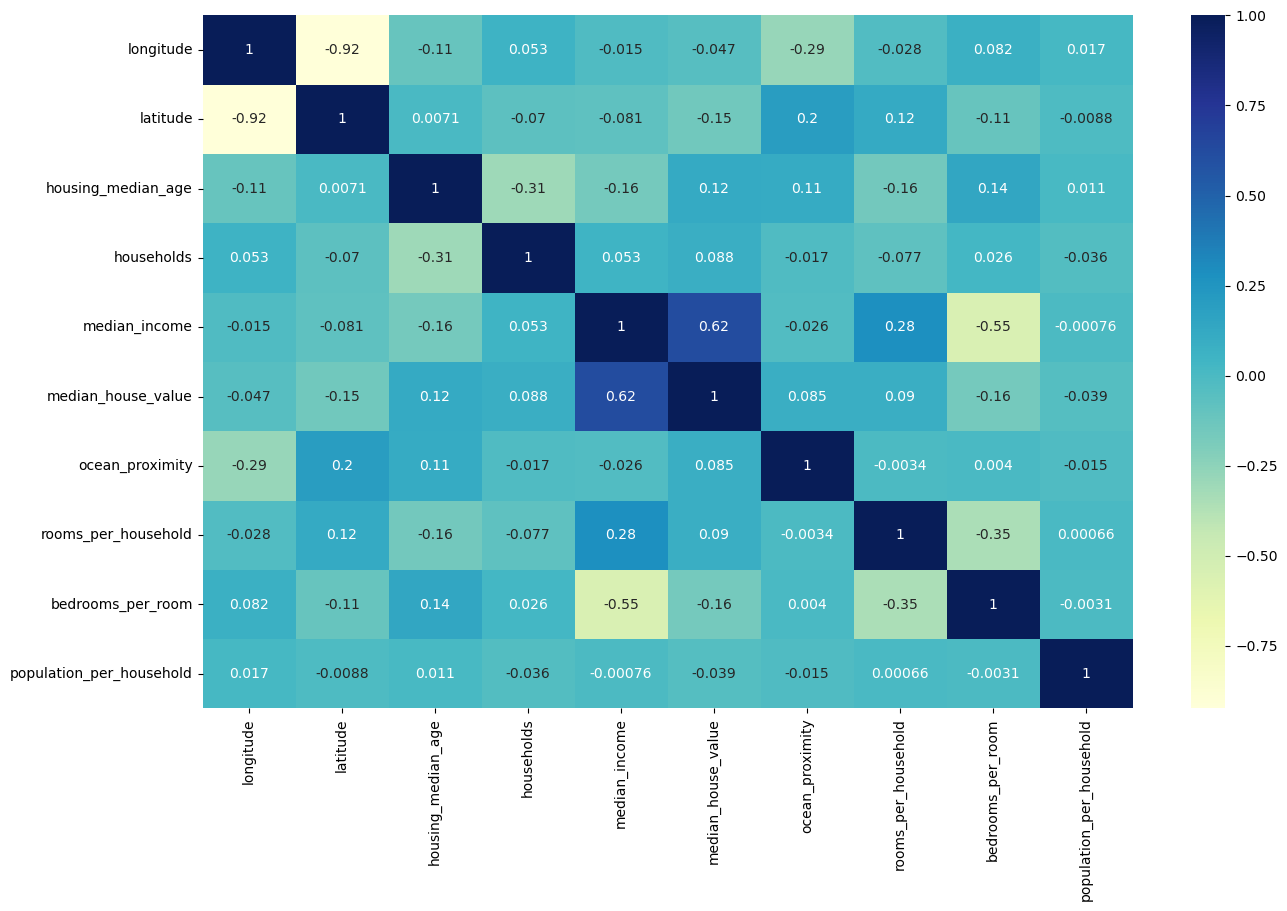

In [39]:
plt.figure(figsize=(15,9))
sns.heatmap( df.corr(),annot=True,cmap='YlGnBu')

In [40]:
df[["ocean_proximity"]]

ocean_proximity
2                    3
3                    3
4                    3
5                    3
6                    3
...                ...
20635                1
20636                1
20637                1
20638                1
20639                1

[19959 rows x 1 columns]

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x_categorical = df[["ocean_proximity"]].apply(label_encoder.fit_transform)
x_numerical = df.drop(columns=["median_house_value", "ocean_proximity"])

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values # combines numerical + categorical


regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True )
#regressor.fit(x, y)

In [51]:
regressor.fit(x, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.6539897046776072
Mean Squared Error: 486816434.41434234
R-squared: 0.9570316856685811


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_RFR, y_train_RFR)

# Predict on test set
y_pred_RFR = regressor.predict(X_test_RFR)

mse_test_RFR = mean_squared_error(y_test_RFR, y_pred_RFR)
r2_test_RFR = r2_score(y_test_RFR, y_pred_RFR)

print("📊 Test Set Evaluation")
print(f"Mean Squared Error: {mse_test_RFR:.2f}")
print(f"R-squared: {r2_test_RFR:.3f}")


📊 Test Set Evaluation
Mean Squared Error: 2528226659.40
R-squared: 0.783


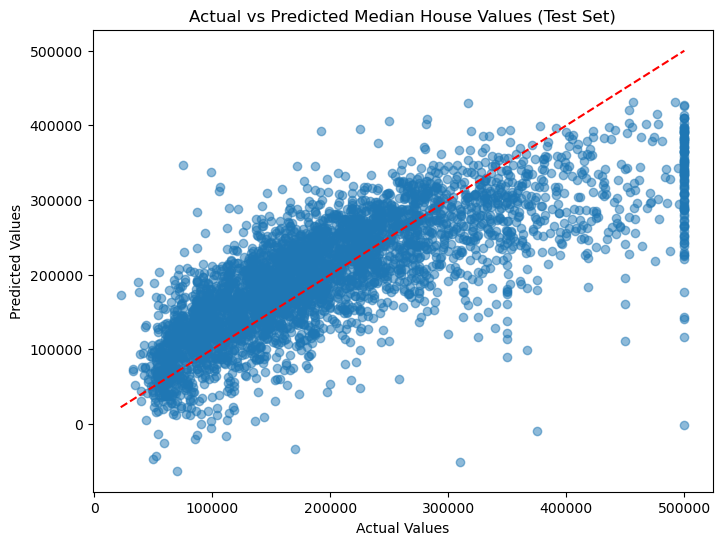

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Values (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [55]:
import pickle


In [ ]:

# save the trained model
filename = "house_price_model.pkl"
pickle.dump(model, open(filename, "wb"))


In [57]:
import pickle

# Save your trained model to a .pkl file
with open("house_price_model1.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model has been successfully saved as 'house_price_model.pkl'")


✅ Model has been successfully saved as 'house_price_model.pkl'
